# Supervised Learning

In machine learning, we face three main types of art:

![](https://miro.medium.com/max/1204/0*-068ud_-o3ajwq_z.jpg)

In Supervised Learning we find the type of "here is the data set where the right answers (labels) are given for each example. Please produce more right answers." Where different techniques are applied:

- __Regression__. Predict a continuous valued output

- __Classification__. Predict a discrete valued output (label/class)

Supervised Learning requires Labelled Training Data, i.e. Pairs of vectors (input, output).

## Families of relationships



Then, a relationship between input and output is built. The results is a:

- Regressor: output is a number
 + Linear Regression
 + K Neighbor Regressor
 + Decision Tree
 
- Classifier: output is a class
 + Logistic Regression
 + K Neighbor Classifier
 + Support Vector Machine
 + Decision Tree Classifier
 

## Evaluation of Performance

- Regression. 
 + RMSE
 + MAE and MAPE
 + Correlation and Bias
 
- Classification
 + Accuracy
 + Precision and Recall
 + AUC Curve

# Regression

__Problem Statement__

We would like to predict the price of a house. we have labeled data with:
- input: area of the house
- output: price of the house

Predict house prices

In [10]:
%pylab inline
import pandas as pd
import sklearn
df = pd.read_csv("https://raw.githubusercontent.com/rezpe/datos_viz/master/house_prices.csv")

Populating the interactive namespace from numpy and matplotlib


In [5]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df = df[df['TotalSF']<6000]

In [6]:
# Data Preparation
X = df[['TotalSF']] #pandas DataFrame -- INPUT
y = df[['SalePrice']] #pandas Series -- OUTPUT
#X use to be Capital and y lower case

In [15]:
X.head(5)

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343


In [16]:
y.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


## Linear Regression

In [11]:
# Load the library
from sklearn.linear_model import LinearRegression

In [17]:
# Create an instance of the model
reg = LinearRegression()

In [18]:
# Fit the regressor
reg.fit(X,y)

LinearRegression()

In [20]:
# Predict
reg.predict([[2500],[4000]])

array([[175904.26499715],
       [301591.19559442]])

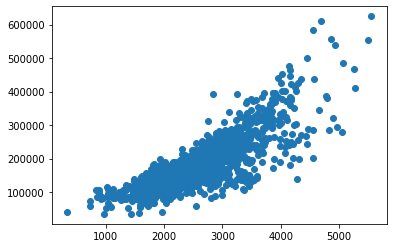

In [21]:
plt.scatter(X,y)

In [23]:
x_hip = np.linspace(500,6000)
x_hip

array([ 500.        ,  612.24489796,  724.48979592,  836.73469388,
        948.97959184, 1061.2244898 , 1173.46938776, 1285.71428571,
       1397.95918367, 1510.20408163, 1622.44897959, 1734.69387755,
       1846.93877551, 1959.18367347, 2071.42857143, 2183.67346939,
       2295.91836735, 2408.16326531, 2520.40816327, 2632.65306122,
       2744.89795918, 2857.14285714, 2969.3877551 , 3081.63265306,
       3193.87755102, 3306.12244898, 3418.36734694, 3530.6122449 ,
       3642.85714286, 3755.10204082, 3867.34693878, 3979.59183673,
       4091.83673469, 4204.08163265, 4316.32653061, 4428.57142857,
       4540.81632653, 4653.06122449, 4765.30612245, 4877.55102041,
       4989.79591837, 5102.04081633, 5214.28571429, 5326.53061224,
       5438.7755102 , 5551.02040816, 5663.26530612, 5775.51020408,
       5887.75510204, 6000.        ])

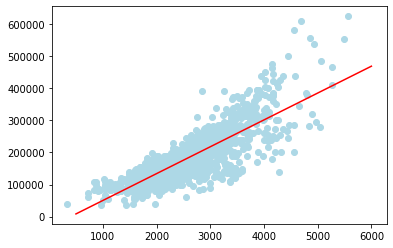

In [25]:
predictions = reg.predict(pd.DataFrame(x_hip))
plt.scatter(X,y,c='lightblue')
plt.plot(x_hip,predictions,c='red')

In [28]:
reg.coef_, reg.intercept_
# pendiente y ordenada en el origen

(array([[83.79128706]]), array([-33573.95266496]))

Controversy about the linear model in python
(https://www.datanalytics.com/2019/07/17/sobre-la-peculiarisima-implementacion-del-modelo-lineal-en-pseudo-scikit-learn/)

__How good is my regressor?__

In order to evaluate the regressor we just created, we would need to compare the
predictions with real actual values. We are TESTING the regressor.

We divide our labeled original data into 2 sets: Training and Testing Sets

In [30]:
# Load the library
from sklearn.model_selection import train_test_split

# Create 2 groups each with input and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

# Fit only with training data
reg.fit(X_train, y_train)

LinearRegression()

In [31]:
predictions = reg.predict(X_test)
predictions[:5]

array([[191016.93856608],
       [165371.0841643 ],
       [ 70913.0857736 ],
       [147596.72962841],
       [191016.93856608]])

In [32]:
y_test[:5]

,SalePrice
145,130000
1446,157900
649,84500
387,125000
193,130000


![](https://lh3.googleusercontent.com/proxy/SMq8u5OXKA1KaG1zCQq1ecJis0SMhQ7kZSPZimlMB-JrUZa3OqmGDmTN2nAxF0yxtDmMylAATBSuSEikVMYBP2VZPdN5qL6D7i2gUkObP6s7AODL-sg)

__MAE__ is the sum of the absolute values of the error

__MAPE__ is almost the same but gives te percentage of the absolute value of error


In [37]:
# Load the scorer
from sklearn.metrics import mean_absolute_error

# Use against predictions
mean_absolute_error(reg.predict(X_test), y_test)

28882.329158130713

In [40]:
np.mean(np.abs(reg.predict(X_test)-y_test)/y_test)
# This give us the MAPE

SalePrice    0.173532
dtype: float64

## K Nearest Neighbor

k Nearest Neighbors predicts by taking the k nearest neighbors to the input from
the training data, and then combines the labels of each.

It requires that the dataset has a DISTANCE. No Training Phase, BUT it keeps all the data

In [70]:
# Load the library
from sklearn.neighbors import KNeighborsRegressor

# Create an instance
regk = KNeighborsRegressor(n_neighbors=20)

# Fit the data
regk.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [71]:
mean_absolute_error(regk.predict(X_test),y_test)

29071.269178082195

In [72]:
np.mean(np.abs(regk.predict(X_test)-y_test)/y_test)

SalePrice    0.166589
dtype: float64

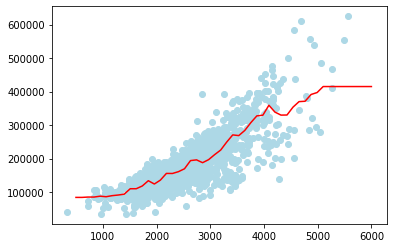

In [73]:
plt.scatter(X,y,c='lightblue')
plt.plot(x_hip,regk.predict(pd.DataFrame(x_hip)),c='red')

In [74]:
# Load the scorer
from sklearn.metrics import mean_squared_error

# Use against predictions (we must calculate the square root of the MSE)
np.sqrt(mean_squared_error(regk.predict(X_test), y_test))

38370.585727170364

In [77]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
regk = KNeighborsRegressor(n_neighbors=5)

### Cross Validation

The dataset is split into n random parts. Then we iterate by:

  - Training with n-1 chunks
  - Test with the remainder
  - We then can calculate mean or variance of the error

In [75]:
# Load the library
from sklearn.model_selection import cross_val_score

# We calculate the metric for several subsets (determined by cv)
# With cv=5, we will have 5 results from 5 training/test
cross_val_score(reg,X,y,cv=10,scoring='neg_mean_squared_error').mean()


-1883601785.1598828

In [78]:
cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error').mean()


-2104283516.0475783

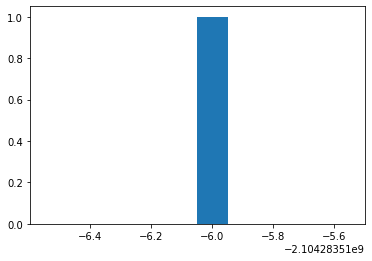

In [81]:
res = cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error').mean()
plt.hist(res);

In [82]:
from sklearn.neighbors import KNeighborsRegressor
res = []
for n in np.arange(2,30):
  regk = KNeighborsRegressor(n_neighbors=n)
  res.append(cross_val_score(regk,X,y,cv=10,scoring='neg_mean_squared_error').mean())

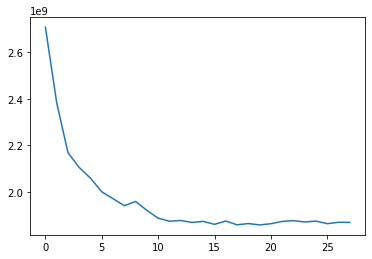

In [83]:
plt.plot(-np.array(res))

11 would be a nice choice

## Testing Parameters: GridSearchCSV

We could then try to find the best parameters by testing all of the combinations of them. We test a GRID of parameters.

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

reg = GridSearchCV(KNeighborsRegressor(),
                  param_grid = {'n_neighbors':np.arange(2,50)})

# Fit will test all of the combinations
reg.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [87]:
# Best estimator and best parameters
reg.best_score_

0.6753742356022112

In [91]:
reg.best_estimator_

KNeighborsRegressor(n_neighbors=25)

In [92]:
reg.best_params_

{'n_neighbors': 25}

## Decision Tree

A decision tree is a structure that includes a root node, branches, and leaf nodes.
Each internal node denotes a test on an attribute, each branch denotes the
outcome of a test, and each leaf node holds a class label. The topmost node in the
tree is the root node.

In [93]:
# Load the library
from sklearn.tree import DecisionTreeRegressor

# Create an instance
regd = DecisionTreeRegressor(min_samples_leaf=100)

# Fit the model
regd.fit(X,y)

DecisionTreeRegressor(min_samples_leaf=100)

In [94]:
cross_val_score(regd,X,y,scoring='neg_mean_squared_error').mean()

-2007069897.0719254

In [ ]:
# Direct Calculation
np.corrcoef(reg.predict(X_test),y_test)[0][1]
# Custom Scorer
from sklearn.metrics import make_scorer
def corr(pred,y_test):
return np.corrcoef(pred,y_test)[0][1]
# Put the scorer in cross_val_score
cross_val_score(reg,X,y,cv=5,scoring=make_scorer(corr))

Metric: Bias

In [100]:
# Direct Calculation
np.mean(reg.predict(X_test)-y_test)

SalePrice    772.890137
dtype: float64

In [103]:
# Custom Scorer
from sklearn.metrics import make_scorer
def bias(pred,y_test):
    return np.mean(pred-y_test)
# Put the scorer in cross_val_score
cross_val_score(reg,X,y,cv=5,scoring=make_scorer(bias))

array([ 1167.83348953,  1549.00217037,  5668.86327933, -1977.24810997,
       -2643.39150712])

__Bias-variance tradeoff__

We must find a compromise between two sources of error:
The bias is error from erroneous assumptions in the learning algorithm. High bias
can cause an algorithm to miss the relevant relations between features and target
outputs (underfitting).
The variance is error from sensitivity to small fluctuations in the training set. High
variance can cause overfitting: modeling the random noise in the training data,
rather than the intended outputs.

In [133]:
#Exercise 1
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"max_depth":np.arange(3,10)})

reg.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])})

In [134]:
reg.best_estimator_


DecisionTreeRegressor(max_depth=3)

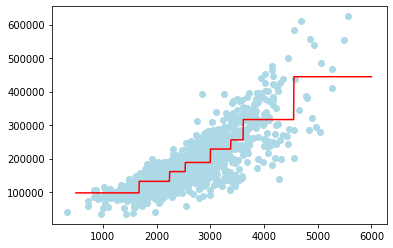

In [135]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')

In [114]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"min_samples_leaf":np.arange(20,1000,100)})
reg.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920])})

In [115]:
reg.best_estimator_

DecisionTreeRegressor(min_samples_leaf=20)

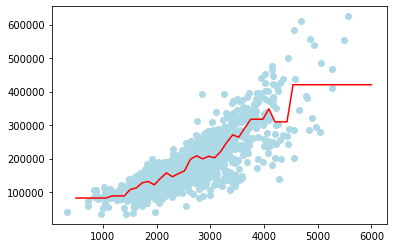

In [116]:
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')

In [117]:
#For unknown cases, linear regression offers better predictions than decision trees, 
#because the latter shows constant values in those cases (see up)

In [126]:
reg = GridSearchCV(DecisionTreeRegressor(), param_grid={"min_samples_leaf":np.arange(20,1000,100),
                                                        "max_depth": np.arange(3,10)})
reg.fit(X,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 20, 120, 220, 320, 420, 520, 620, 720, 820, 920])})

In [127]:
reg.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=20)

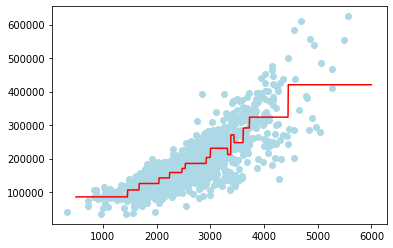

In [128]:
x_hip = np.linspace(500,6000,1000)
plt.scatter(X, y , c='lightblue')
plt.plot(x_hip, reg.predict(pd.DataFrame(x_hip)), c='red')